# Setup

In [2]:
import os

from absl import logging

from pipeline.constants import PIPELINE_NAME
from pipeline.utils import get_gcp_project, get_gcp_region

from tfx_helper.artifact_finder.interface import ArtifactPathGetterInterface
from tfx_helper.artifact_finder.vertex_ai import NewsetRunVertexAIPathGetter

from tfx_helper.visualization.confusion_matrix import plot_binary_classification_confusion_matrix
from tfx_helper.visualization.display_metrics import passed_validation, display_metrics, display_plots, get_slice_names
from tfx_helper.visualization.display_schema import display_schema
from tfx_helper.visualization.display_stats import display_stats, compare_stats
from tfx_helper.visualization.display_anomalies import display_anomalies
from tfx_helper.visualization.threshold_optimization import load_best_threshold
from tfx_helper.visualization.display_hyperparams import display_hyperparams

In [3]:
logging.set_verbosity(logging.DEBUG)

In [4]:
path_getter: ArtifactPathGetterInterface = NewsetRunVertexAIPathGetter(
    pipeline_name=PIPELINE_NAME, region=get_gcp_region(), project=get_gcp_project()
)

# Statistics of raw data

In [4]:
display_stats(path_getter('raw_stats_gen', 'statistics'), lhs_split='Split-train-cv-0')

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/4548134353093515125' for component 'raw_stats_gen'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/18206609712827665457' for output 'statistics'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/raw_stats_gen_5247936014026014720/statistics'


# Schema of raw data

In [5]:
display_schema(path_getter('raw_schema_gen', 'schema'))

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/15823759605712037343' for component 'raw_schema_gen'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/9673134635797564024' for output 'schema'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/raw_schema_gen_-8587122041256148992/schema'


,Type,Presence,Valency,Domain
Feature name,,,,
'Age',FLOAT,required,,-
'Cabin',BYTES,required,,-
'CryoSleep',STRING,required,,'CryoSleep'
'Destination',STRING,required,,'Destination'
'FoodCourt',FLOAT,required,,-
'HomePlanet',STRING,required,,'HomePlanet'
'Name',BYTES,required,,-
'PassengerId',INT,required,,-
'RoomService',FLOAT,required,,-


,Values
Domain,
'CryoSleep',"'False', 'True'"
'Destination',"'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'"
'HomePlanet',"'Earth', 'Europa', 'Mars'"
'Transported',"'False', 'True'"
'VIP',"'False', 'True'"


# Transformed data statistics

In [6]:
display_stats(path_getter('transformed_stats_gen', 'statistics'), lhs_split="Split-train-cv-0", rhs_split="Split-valid")

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/12452127921113909126' for component 'transformed_stats_gen'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/12507101137744595619' for output 'statistics'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/transformed_stats_gen_2942093004812320768/statistics'


# Transformed data schema

In [7]:
display_schema(path_getter('transformed_schema_gen', 'schema'))

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/7693095562619080513' for component 'transformed_schema_gen'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/17631583344643005492' for output 'schema'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/transformed_schema_gen_-3975436022828761088/schema'


,Type,Presence,Valency,Domain
Feature name,,,,
'bucketized_age',INT,required,,-
'bucketized_cabin_num',INT,required,,-
'bucketized_food_court',INT,required,,-
'bucketized_room_service',INT,required,,-
'bucketized_shopping_mall',INT,required,,-
'bucketized_spa',INT,required,,-
'bucketized_total_expenses',INT,required,,-
'bucketized_vr_deck',INT,required,,-
'cabin_deck_vocab',INT,required,,-


# Inference data anomalies

In [8]:
display_anomalies(path_getter('ExampleValidator', 'anomalies'), split_name='all')

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/15519429494839546700' for component 'ExampleValidator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/10375452567187822159' for output 'anomalies'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/ExampleValidator_1212710747902050304/anomalies'


,Anomaly short description,Anomaly long description
Feature name,,
'Transported',Column dropped,Column is completely missing


# Inference data statistics

In [9]:
compare_stats(
    left_dir=path_getter('raw_stats_gen', 'statistics'), left_split="train-cv-0",
    right_dir=path_getter('inference_stats_gen', 'statistics')
)

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/4548134353093515125' for component 'raw_stats_gen'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/18206609712827665457' for output 'statistics'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/raw_stats_gen_5247936014026014720/statistics'
DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46

# Best hyperparams

In [5]:
# display_hyperparams(path_getter('Tuner', 'best_hyperparameters'))
display_hyperparams(path_getter('latest_hyperparams_resolver', 'hyperparameters'))

DEBUG:absl:Found 8 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220727071616' created 2022-07-27 07:16:18.959000+00:00, updated 2022-07-27 07:16:18.959000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/15709095369769099388' for component 'latest_hyperparams_resolver'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/4480166443844905066' for output 'hyperparameters'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220721110503/Tuner_7343306109404315648/best_hyperparameters'


{'embedding_size': 32,
 'learning_rate': 0.0001,
 'number_of_hidden_layers': 4,
 'first_hidden_layer_size': 512,
 'dropout': 0.5}

# Overall metrics

In [8]:
display_metrics(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:Found 8 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220727071616' created 2022-07-27 07:16:18.959000+00:00, updated 2022-07-27 07:16:18.959000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/3038257441633671813' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/6908743185617269310' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220727071616/Evaluator_-2232261492059668480/evaluation'


SlicingMetricsViewer(config={'weightedExamplesColumn': 'example_count'}, data=[{'slice': 'Overall', 'metrics':…

# Metrics by home planet

In [13]:
display_metrics(path_getter('Evaluator', 'evaluation'), column='HomePlanet')

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/17141981076283682343' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/12844842924475248085' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/Evaluator_-2246053765918490624/evaluation'


SlicingMetricsViewer(config={'weightedExamplesColumn': 'example_count'}, data=[{'slice': 'HomePlanet:Earth', '…

# Metrics by destination

In [14]:
display_metrics(path_getter('Evaluator', 'evaluation'), column='Destination')

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/17141981076283682343' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/12844842924475248085' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/Evaluator_-2246053765918490624/evaluation'


SlicingMetricsViewer(config={'weightedExamplesColumn': 'example_count'}, data=[{'slice': 'Destination:TRAPPIST…

# Plots for overall slice

In [15]:
display_plots(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/17141981076283682343' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/12844842924475248085' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/Evaluator_-2246053765918490624/evaluation'


PlotViewer(config={'sliceName': 'Overall', 'metricKeys': {'calibrationPlot': {'metricName': 'calibrationHistog…

# Plots for Earthlings

In [16]:
display_plots(path_getter('Evaluator', 'evaluation'), slice_key={'HomePlanet': 'Earth'})

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/17141981076283682343' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/12844842924475248085' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/Evaluator_-2246053765918490624/evaluation'


PlotViewer(config={'sliceName': 'HomePlanet:Earth', 'metricKeys': {'calibrationPlot': {'metricName': 'calibrat…

# Plots for Martians

In [17]:
display_plots(path_getter('Evaluator', 'evaluation'), slice_key={'HomePlanet': 'Mars'})

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/17141981076283682343' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/12844842924475248085' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/Evaluator_-2246053765918490624/evaluation'


PlotViewer(config={'sliceName': 'HomePlanet:Mars', 'metricKeys': {'calibrationPlot': {'metricName': 'calibrati…

# Validation passed

In [6]:
passed_validation(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:Found 8 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220727071616' created 2022-07-27 07:16:18.959000+00:00, updated 2022-07-27 07:16:18.959000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/3038257441633671813' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/6908743185617269310' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220727071616/Evaluator_-2232261492059668480/evaluation'


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


False

# Slices available

In [19]:
get_slice_names(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:Found 7 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220725104638' created 2022-07-25 10:46:41.436000+00:00, updated 2022-07-25 10:46:41.436000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/17141981076283682343' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/12844842924475248085' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220725104638/Evaluator_-2246053765918490624/evaluation'


[(('HomePlanet', 'Earth'),),
 (('VIP', 'False'),),
 (),
 (('CryoSleep', 'False'),),
 (('Destination', 'TRAPPIST-1e'),),
 (('HomePlanet', 'Mars'),),
 (('Destination', '55 Cancri e'),),
 (('CryoSleep', 'True'),),
 (('HomePlanet', 'Europa'),),
 (('Destination', 'PSO J318.5-22'),),
 (('VIP', 'True'),)]

# Overall confusion matrix

In [9]:
best_threshold = load_best_threshold(path_getter('BinaryClassificationThresholdOptimizer', 'best_threshold'))
best_threshold

DEBUG:absl:Found 8 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220727071616' created 2022-07-27 07:16:18.959000+00:00, updated 2022-07-27 07:16:18.959000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/16287134981251497701' for component 'BinaryClassificationThresholdOptimizer'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/12189637851305834999' for output 'best_threshold'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220727071616/BinaryClassificationThresholdOptimizer_2379424526367719424/best_threshold'


0.418

DEBUG:absl:Found 8 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220727071616' created 2022-07-27 07:16:18.959000+00:00, updated 2022-07-27 07:16:18.959000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/3038257441633671813' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/6908743185617269310' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220727071616/Evaluator_-2232261492059668480/evaluation'
DEBUG:absl:For sought threshold 0.500000 found data with threshold 0.500000
DEBUG:absl:Confusion matrix counts [[500 121]
 [136 493]]
DEBUG:absl:Confusion matrix normalized [[0.80515298 0.19484702]
 [0.21621622 0.78378378]]


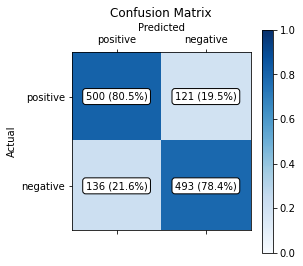

In [10]:
plot_binary_classification_confusion_matrix(path_getter('Evaluator', 'evaluation'))

DEBUG:absl:Found 8 pipeline runs
DEBUG:absl:Selected run 'projects/170655986839/locations/europe-west4/metadataStores/default/contexts/spaceshiptitanic-20220727071616' created 2022-07-27 07:16:18.959000+00:00, updated 2022-07-27 07:16:18.959000+00:00
DEBUG:absl:Found execution 'projects/170655986839/locations/europe-west4/metadataStores/default/executions/3038257441633671813' for component 'Evaluator'
DEBUG:absl:Found artifact 'projects/170655986839/locations/europe-west4/metadataStores/default/artifacts/6908743185617269310' for output 'evaluation'
DEBUG:absl:Returning artifact URI 'gs://pipelines-hackathon/spaceship-titanic/tfx_pipeline_output/spaceshiptitanic/170655986839/spaceshiptitanic-20220727071616/Evaluator_-2232261492059668480/evaluation'
DEBUG:absl:For sought threshold 0.418000 found data with threshold 0.418000
DEBUG:absl:Confusion matrix counts [[537  84]
 [163 466]]
DEBUG:absl:Confusion matrix normalized [[0.8647343  0.1352657 ]
 [0.25914149 0.74085851]]


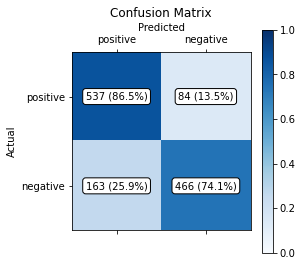

In [11]:
plot_binary_classification_confusion_matrix(path_getter('Evaluator', 'evaluation'), threshold=best_threshold)